## Set up

In [0]:
# Load basic library
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import random
from sklearn.externals import joblib 
from scipy import stats

# Load Keras
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout

#Load sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import log_loss 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score 

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier #Very slow compare to XGboost or LGBM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#Special
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#Load visual neural:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# import require packages for plotting
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import altair as alt # no need to add altviewer
from pandas.plotting import scatter_matrix


In [0]:
t1=time.time()
file='https://media.githubusercontent.com/media/aapatel09/handson-unsupervised-learning/master/datasets/credit_card_data/credit_card.csv'
data=pd.read_csv(file)
t2=time.time()
print('time',t2-t1)
data.head()

time 9.447160482406616


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [0]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [0]:
distinctCounter = data.apply(lambda x: len(x.unique()))
distinctCounter

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

## Data transform

In [0]:
# Generate feature matrix and labels array
dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

In [0]:
# Feature scaling
featuresToScale = dataX.drop(['Time'],axis=1).columns

In [0]:
sX =StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])
scalingFactors = pd.DataFrame(data=[sX.mean_,sX.scale_],index=['Mean','StDev'],columns=featuresToScale)
scalingFactors

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,8.176030e-16,1.206296e-15,4.913003e-15,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619
StDev,1.958692e+00,1.651306e+00,1.516252e+00,1.415866e+00,1.380244e+00,1.332269e+00,1.237091e+00,1.194351e+00,1.098630e+00,1.088848e+00,1.020711e+00,9.991996e-01,9.952725e-01,9.585939e-01,9.153144e-01,8.762513e-01,8.493356e-01,8.381747e-01,8.140391e-01,7.709237e-01,7.345227e-01,7.257003e-01,6.244592e-01,6.056460e-01,5.212772e-01,4.822262e-01,4.036318e-01,3.300827e-01,250.119670


In [0]:
dataX.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,-0.540407,-0.618296,-0.996099,-0.324610,1.604014,-0.536833,0.244863,0.030770,0.496282,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,0.0,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,1.580003,1.066089,0.491418,-0.149982,0.694360,0.529434,-0.135170,-0.218763,-0.179086,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,1.0,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,0.611830,0.066137,0.720700,-0.173114,2.562906,-3.298235,1.306868,-0.144790,-2.778561,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,1.0,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,-0.221892,0.178371,0.510169,-0.300360,-0.689837,-1.209296,-0.805445,2.345305,-1.514205,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,2.0,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,-0.806147,0.538627,1.352244,-1.168034,0.191323,-0.515205,-0.279081,-0.045569,0.987037,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [0]:
dataX.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,-8.157366e-16,3.154853e-17,-4.409878e-15,-6.734811e-16,-2.874435e-16,4.168992e-16,-8.767997e-16,-2.423604e-16,3.078727e-16,2.026926e-17,1.622758e-15,2.052953e-15,-8.310622e-17,-8.845502e-16,-1.789241e-15,-1.542079e-16,8.046919e-16,-2.547965e-16,-4.550555e-16,2.754870e-16,1.685077e-17,1.478472e-15,-6.797197e-16,1.234659e-16,-7.659279e-16,3.247603e-16,-2.953495e-18,5.401572e-17,3.202236e-16
std,47488.145955,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,-2.258191e+01,-4.700128e+00,-1.869868e+01,-5.819392e+00,-2.004428e+01,-4.915191e+00,-1.612534e+01,-2.962645e+01,-1.133266e+01,-8.861402e+00,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,54201.500000,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,-4.917360e-01,-7.470224e-01,-4.058964e-01,-6.516198e-01,-4.439565e-01,-6.368132e-01,-5.341353e-01,-5.695609e-01,-5.951621e-01,-5.605369e-01,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,84692.000000,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,-8.533551e-02,-3.209268e-02,1.401448e-01,-1.363250e-02,5.278702e-02,5.251917e-02,7.579255e-02,-7.732604e-02,-4.338370e-03,4.588014e-03,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,139320.500000,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,4.168842e-01,7.245863e-01,6.187332e-01,6.656518e-01,5.144513e-01,7.088502e-01,5.971989e-01,4.705737e-01,5.974968e-01,5.637928e-01,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,172792.000000,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,2.180758e+01,1.177504e+01,7.854679e+00,7.160735e+00,1.098147e+01,9.699117e+00,1.976044e+01,1.089502e+01,6.014342e+00,6.869414e+00,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


Text(0, 0.5, 'Frequency Percentage')

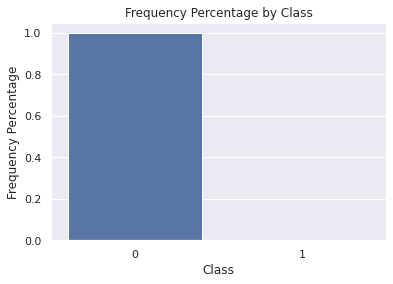

In [0]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
ax = sns.barplot(x=count_classes.index, y=tuple(count_classes/len(data)))
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency Percentage')

## Model preparation

In [0]:
X_train, X_test, y_train, y_test = train_test_split(dataX, 
                                    dataY, test_size=0.33, 
                                    random_state=2018, stratify=dataY)
print(X_train.shape)
print(X_test.shape)
X_train.head()

(190820, 30)
(93987, 30)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
142087,84575.0,-1.011878,1.170867,0.201381,-0.252129,-0.386390,-0.049420,-0.192587,0.932578,-0.220587,0.378852,0.891074,0.647913,-0.481924,0.886427,0.511591,0.459248,-0.176015,-0.127882,-0.030033,0.238737,-0.233631,-0.783226,0.157078,-0.586703,-0.161425,0.230941,0.525280,0.473651,-0.297296
165168,117245.0,0.072173,0.665164,-0.241837,-0.380205,0.699456,-0.634194,0.838470,-0.137344,-0.167262,-0.790319,-0.489896,0.363837,0.879481,-1.240116,-0.370056,0.316326,0.391812,-0.403472,-0.309831,0.098082,-0.446548,-1.039925,0.148460,1.079003,-0.761713,0.220597,0.564453,0.262996,-0.337757
235908,148591.0,0.099579,-0.389819,-0.944884,-1.492064,-0.090536,-0.879539,1.260059,-0.577069,-2.758547,0.977409,-0.732842,-0.937703,0.749455,0.176803,-1.085530,-2.044358,1.112251,-0.420870,0.040079,0.135386,0.615087,2.051663,0.537784,1.887247,-0.950002,0.194730,0.394588,0.814038,0.499962
148255,89630.0,0.015623,0.520260,0.191791,-0.418058,0.320155,-0.775673,0.821509,-0.159150,-0.060892,-0.391007,-0.836480,0.227011,0.138962,0.096076,-0.404399,-0.179650,-0.423797,-1.016950,-0.193345,-0.039324,-0.342336,-0.740217,0.130539,-0.027853,-0.956686,0.296304,0.619910,0.294929,-0.329281
145672,87121.0,0.009169,0.524802,0.173686,-0.334556,0.766454,0.505087,0.267757,0.189101,-0.186534,-0.833822,0.231309,0.688669,1.262601,-1.535982,-0.324980,1.231887,-0.313090,1.377342,0.855879,0.107825,-0.201647,-0.456069,0.049791,-0.727602,-2.183860,-0.148240,0.585847,0.762249,-0.333279


In [0]:
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

0.0017293784718582959
0.0017236426314277506


In [0]:
k_fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2018)

## Base method (not use any sampling)

### Null accuracy

In [0]:
y_test.value_counts(normalize=True)

0    0.998276
1    0.001724
Name: Class, dtype: float64

### Logistic Regression

In [0]:
penalty = 'l2'
C = 1.0
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C, 
            class_weight=class_weight, random_state=random_state, 
                            solver=solver, n_jobs=n_jobs)

For this logistic regression model, we will set the class_weight to balanced. This signals to the logistic regression algorithm that we have an imbalanced class problem; the algorithm will need to weigh the positive labels more heavily as it trains. In this case, the weights will be inversely proportional to the class frequencies; the algorithm will assign higher weights to the rare positive labels (i.e., fraud) and lower weights to the more frequent negative labels (i.e., not fraud).

The random state is fixed to 2018 to help others—such as you, the reader —reproduce results. We will keep the default solver liblinear.

In [0]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=['pred','pred_prob'])
predictionsBasedOnKFolds.head()

,pred,pred_prob
142087,NaN,NaN
165168,NaN,NaN
235908,NaN,NaN
148255,NaN,NaN
145672,NaN,NaN


In [0]:
model = logReg

for train_index, cv_index in k_fold.split(np.zeros(len(X_train))
                                          ,y_train.ravel()):
  #train_index: 152656
  #cv_index: 38164 (split 5 from X_train)
  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
      X_train.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train.iloc[train_index], \
      y_train.iloc[cv_index]
  #X_train_fold: X_train split, y_train_fold: y_train split
  #X_cv_fold: X_train split for validate, y_cv_fold: y_train split for validate

  model.fit(X_train_fold, y_train_fold) # fit training
  loglossTraining = log_loss(y_train_fold, 
                              model.predict_proba(X_train_fold)[:,1])
  trainingScores.append(loglossTraining)

  #y_pred=model.predict(X_cv_fold)
  #y_pred_probs=model.predict_proba(X_cv_fold)[:,1]
  
  predictionsBasedOnKFolds.loc[X_cv_fold.index,'pred_prob'] = model.predict_proba(X_cv_fold)[:,1]  
  predictionsBasedOnKFolds.loc[X_cv_fold.index,'pred'] = model.predict(X_cv_fold)  

  loglossCV = log_loss(y_cv_fold, 
                       #model.predict_proba(X_cv_fold)[:,1])
                        predictionsBasedOnKFolds.loc[X_cv_fold.index,'pred_prob'])
  cvScores.append(loglossCV)

  print('Training Log Loss: ', loglossTraining)
  print('CV Log Loss: ', loglossCV)
    
loglossLogisticRegression = log_loss(y_train, 
                                     predictionsBasedOnKFolds.loc[:,'pred_prob'])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)

Training Log Loss:  0.10966450675373615
CV Log Loss:  0.10878937377819534
Training Log Loss:  0.10456253075352834
CV Log Loss:  0.10403949182025926
Training Log Loss:  0.1153865429073515
CV Log Loss:  0.11764573298351307
Training Log Loss:  0.11558015904920611
CV Log Loss:  0.11816691615677673
Training Log Loss:  0.09709819816667246
CV Log Loss:  0.09697807129012978
Logistic Regression Log Loss:  0.10912391720577486


The training log loss and cross-validation log loss are shown for each of
the five runs in the following code. Generally (but not always) the training
log loss will be lower than the cross-validation log loss. Because the
machine learning algorithm has learned directly from the training data, its
performance (i.e., log loss) should be better on the training set than on the
cross-validation set. Remember, the cross-validation set has the
transactions that were explicitly held out from the training exercise

In [0]:
predictionsBasedOnKFolds.head()

,pred,pred_prob
142087,0,0.000824035
165168,0,0.0319596
235908,0,0.159257
148255,0,0.00690995
145672,0,0.0373433


In [0]:
preds = pd.concat([y_train,predictionsBasedOnKFolds], axis=1)
preds.columns = ['true','pred','pred_prob']
preds['pred']=preds['pred'].astype('int64')
predictionsBasedOnKFoldsLogisticRegression = preds.copy()
predictionsBasedOnKFoldsLogisticRegression.head()

,true,pred,pred_prob
142087,0,0,0.000824035
165168,0,0,0.0319596
235908,0,0,0.159257
148255,0,0,0.00690995
145672,0,0,0.0373433


In [0]:
print(preds['true'].value_counts(normalize=True))
print(preds['pred'].value_counts(normalize=True))

0    0.998271
1    0.001729
Name: true, dtype: float64
0    0.974494
1    0.025506
Name: pred, dtype: float64


In [0]:
preds.dtypes

true          int64
pred          int64
pred_prob    object
dtype: object

In [0]:
precision, recall, thresholds = precision_recall_curve(preds['true'],preds['pred_prob'])
average_precision = average_precision_score(preds['true'],preds['pred_prob'])
fpr, tpr, thresholds = roc_curve(preds['true'],preds['pred_prob'])
areaUnderROC = auc(fpr, tpr)

In [0]:
from scipy import stats
stats.describe(thresholds)

DescribeResult(nobs=447, minmax=(1.7853933916450304e-46, 2.0), mean=0.36933235259742453, variance=0.17741759551672287, skewness=0.7359138712266544, kurtosis=-0.9734888722050301)

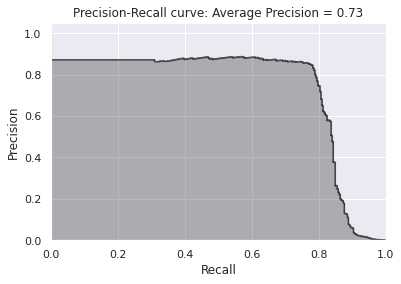

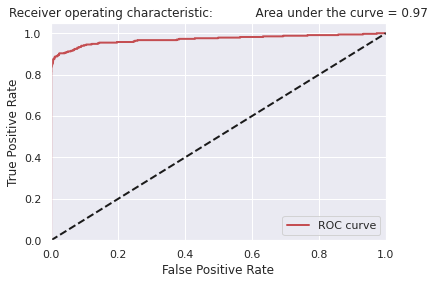

In [0]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [0]:
confmat = confusion_matrix(pd.DataFrame(preds['true']),preds['pred'])
print('accuracy_score: \n',accuracy_score(preds['true'],preds['pred']))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(preds['true'],preds['pred']))

accuracy_score: 
 0.9758777905879886
confusion_matrix 
 [[185920   4570]
 [    33    297]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    190490
           1       0.06      0.90      0.11       330

    accuracy                           0.98    190820
   macro avg       0.53      0.94      0.55    190820
weighted avg       1.00      0.98      0.99    190820



### Random forest

In [0]:
n_estimators = 10
max_features = 'auto'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 2018
class_weight = 'balanced'

RFC = RandomForestClassifier(n_estimators=n_estimators, 
        max_features=max_features, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf, 
        max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap, 
        oob_score=oob_score, n_jobs=n_jobs, random_state=random_state, 
        class_weight=class_weight)

In [0]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=['pred','pred_prob'])

model = RFC

for train_index, cv_index in k_fold.split(np.zeros(len(X_train))
                                          ,y_train.ravel()):
  #train_index: 152656
  #cv_index: 38164 (split 5 from X_train)
  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
      X_train.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train.iloc[train_index], \
      y_train.iloc[cv_index]
  #X_train_fold: X_train split, y_train_fold: y_train split
  #X_cv_fold: X_train split for validate, y_cv_fold: y_train split for validate

  model.fit(X_train_fold, y_train_fold) # fit training
  loglossTraining = log_loss(y_train_fold, 
                              model.predict_proba(X_train_fold)[:,1])
  trainingScores.append(loglossTraining)
  
  predictionsBasedOnKFolds.loc[X_cv_fold.index,'pred_prob'] = model.predict_proba(X_cv_fold)[:,1]  
  predictionsBasedOnKFolds.loc[X_cv_fold.index,'pred'] = model.predict(X_cv_fold)  

  loglossCV = log_loss(y_cv_fold, 
                        predictionsBasedOnKFolds.loc[X_cv_fold.index,'pred_prob'])
  cvScores.append(loglossCV)

  print('Training Log Loss: ', loglossTraining)
  print('CV Log Loss: ', loglossCV)
    
loglossLogisticRegression = log_loss(y_train, 
                                     predictionsBasedOnKFolds.loc[:,'pred_prob'])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)

Training Log Loss:  0.0004717456539906082
CV Log Loss:  0.009958407581679842
Training Log Loss:  0.00039391696555908875
CV Log Loss:  0.012614958898596576
Training Log Loss:  0.0003955086800568252
CV Log Loss:  0.008311598856605153
Training Log Loss:  0.0004174848852259459
CV Log Loss:  0.009209166975528824
Training Log Loss:  0.00042710655140527107
CV Log Loss:  0.014292100977712807
Logistic Regression Log Loss:  0.01087724665802464


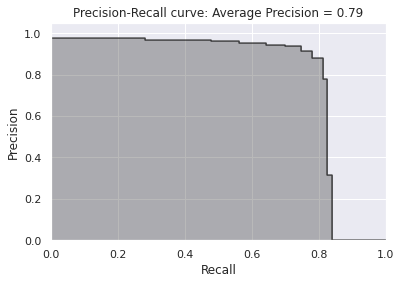

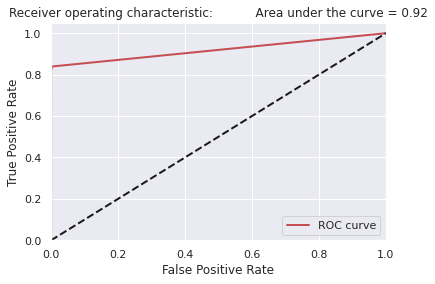

In [0]:
preds = pd.concat([y_train,predictionsBasedOnKFolds], axis=1)
preds.columns = ['true','pred','pred_prob']
preds['pred']=preds['pred'].astype('int64')
predictionsBasedOnKFoldsRandomForests = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['true'],preds['pred_prob'])
average_precision = average_precision_score(preds['true'],preds['pred_prob'])
fpr, tpr, thresholds = roc_curve(preds['true'],preds['pred_prob'])
areaUnderROC = auc(fpr, tpr)


plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [0]:
confmat = confusion_matrix(pd.DataFrame(preds['true']),preds['pred'])
print('accuracy_score: \n',accuracy_score(preds['true'],preds['pred']))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(preds['true'],preds['pred']))

accuracy_score: 
 0.9994078188869091
confusion_matrix 
 [[190476     14]
 [    99    231]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    190490
           1       0.94      0.70      0.80       330

    accuracy                           1.00    190820
   macro avg       0.97      0.85      0.90    190820
weighted avg       1.00      1.00      1.00    190820



### XGB

In [0]:
params_xGB = {
    'nthread':16, #number of cores
    'learning rate': 0.3, #range 0 to 1, default 0.3
    'gamma': 0, #range 0 to infinity, default 0 
        # increase to reduce complexity (increase bias, reduce variance)
    'max_depth': 6, #range 1 to infinity, default 6
    'min_child_weight': 1, #range 0 to infinity, default 1
    'max_delta_step': 0, #range 0 to infinity, default 0
    'subsample': 1.0, #range 0 to 1, default 1
        # subsample ratio of the training examples
    'colsample_bytree': 1.0, #range 0 to 1, default 1 
        # subsample ratio of features
    'objective':'binary:logistic',
    'num_class':1,
    'eval_metric':'logloss',
    'seed':2018,
    'silent':1
}

In [0]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=['pred','pred_prob'])


for train_index, cv_index in k_fold.split(np.zeros(len(X_train))
                                          ,y_train.ravel()):
  #train_index: 152656
  #cv_index: 38164 (split 5 from X_train)
  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
      X_train.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train.iloc[train_index], \
      y_train.iloc[cv_index]
  #X_train_fold: X_train split (4/5), y_train_fold: y_train split
  #X_cv_fold: X_train split for validate (1/5), y_cv_fold: y_train split for validate

  dtrain = xgb.DMatrix(data=X_train_fold, label=y_train_fold)
  dCV = xgb.DMatrix(data=X_cv_fold)
  
  #bst = xgb.cv(params_xGB, dtrain, num_boost_round=2000, 
  #              nfold=5, early_stopping_rounds=200, verbose_eval=50)
  #best_rounds = np.argmin(bst['test-logloss-mean'])
  #bst = xgb.train(params_xGB, dtrain, best_rounds)
  bst = xgb.train(params_xGB, dtrain)

  loglossTraining = log_loss(y_train_fold, bst.predict(dtrain))
  trainingScores.append(loglossTraining)
  

  #predictionsBasedOnKFolds.loc[X_cv_fold.index,'pred_prob'] = bst.predict_proba(dCV)[:,1]  
  predictionsBasedOnKFolds.loc[X_cv_fold.index,'pred_prob'] = bst.predict(dCV)  

  loglossCV = log_loss(y_cv_fold, 
                        predictionsBasedOnKFolds.loc[X_cv_fold.index,'pred_prob'])
  cvScores.append(loglossCV)

  print('Training Log Loss: ', loglossTraining)
  print('CV Log Loss: ', loglossCV)
    
loglossLogisticRegression = log_loss(y_train, 
                                     predictionsBasedOnKFolds.loc[:,'pred_prob'])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)
# Save the model as a pickle in a file 
#joblib.dump(bst, '/content/drive/My Drive/Data/bst_cv.pkl') 

Training Log Loss:  0.023925105717669388
CV Log Loss:  0.02412808732781769
Training Log Loss:  0.023936098263472667
CV Log Loss:  0.024703475253338474
Training Log Loss:  0.023979834463883076
CV Log Loss:  0.024136697735912482
Training Log Loss:  0.024015753466212597
CV Log Loss:  0.0244120485613262
Training Log Loss:  0.023771190331355066
CV Log Loss:  0.02468161625781566
Logistic Regression Log Loss:  0.024412385027242106


In [0]:
# Load the model from the file 
#bst = joblib.load('/content/drive/My Drive/Data/bst_cv.pkl')  

In [0]:
predictionsBasedOnKFolds.loc[predictionsBasedOnKFolds['pred_prob']<0.5,'pred']=0
predictionsBasedOnKFolds.loc[predictionsBasedOnKFolds['pred_prob']>=0.5,'pred']=1
predictionsBasedOnKFolds

,pred,pred_prob
142087,0,0.0224605
165168,0,0.0224422
235908,0,0.0224628
148255,0,0.0224117
145672,0,0.0224422
...,...,...
30023,0,0.0224605
195475,0,0.0224628
48687,0,0.0224628
159608,0,0.0224512


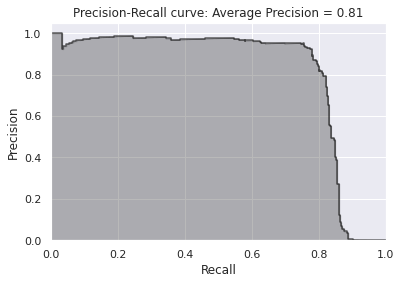

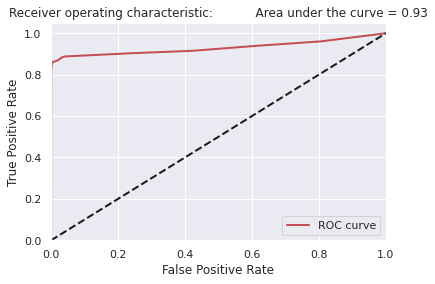

In [0]:
preds = pd.concat([y_train,predictionsBasedOnKFolds], axis=1)
preds.columns = ['true','pred','pred_prob']
preds['pred']=preds['pred'].astype('int64')
predictionsBasedOnKFoldsXGBoostGradientBoosting = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['true'],preds['pred_prob'])
average_precision = average_precision_score(preds['true'],preds['pred_prob'])
fpr, tpr, thresholds = roc_curve(preds['true'],preds['pred_prob'])
areaUnderROC = auc(fpr, tpr)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [0]:
confmat = confusion_matrix(pd.DataFrame(preds['true']),preds['pred'])
print('accuracy_score: \n',accuracy_score(preds['true'],preds['pred']))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(preds['true'],preds['pred']))

accuracy_score: 
 0.9995073891625615
confusion_matrix 
 [[190471     19]
 [    75    255]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    190490
           1       0.93      0.77      0.84       330

    accuracy                           1.00    190820
   macro avg       0.97      0.89      0.92    190820
weighted avg       1.00      1.00      1.00    190820



### LightGB

In [0]:
params_lightGB = {
    'task': 'train',
    'application':'binary',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': 0,
    'num_threads':16
}

In [0]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=['pred','pred_prob'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, \
                gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'pred_prob'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration) 
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,'pred_prob'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLightGBMGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:,'pred_prob'])
print('LightGBM Gradient Boosting Log Loss: ', loglossLightGBMGradientBoosting)
# Save the model as a pickle in a file 
joblib.dump(gbm, '/content/drive/My Drive/Data/lgb_cv.pkl') 

[1]	valid_0's binary_logloss: 0.00634115
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's binary_logloss: 0.00627492
[3]	valid_0's binary_logloss: 0.00620527
[4]	valid_0's binary_logloss: 0.00616014
[5]	valid_0's binary_logloss: 0.00609608
[6]	valid_0's binary_logloss: 0.0060474
[7]	valid_0's binary_logloss: 0.0059922
[8]	valid_0's binary_logloss: 0.00593688
[9]	valid_0's binary_logloss: 0.00588275
[10]	valid_0's binary_logloss: 0.00582962
[11]	valid_0's binary_logloss: 0.00577838
[12]	valid_0's binary_logloss: 0.00573037
[13]	valid_0's binary_logloss: 0.00568343
[14]	valid_0's binary_logloss: 0.00563845
[15]	valid_0's binary_logloss: 0.00559177
[16]	valid_0's binary_logloss: 0.00554777
[17]	valid_0's binary_logloss: 0.00550471
[18]	valid_0's binary_logloss: 0.00546175
[19]	valid_0's binary_logloss: 0.00542175
[20]	valid_0's binary_logloss: 0.00538166
[21]	valid_0's binary_logloss: 0.00534326
[22]	valid_0's binary_logloss: 0.00530349
[23]	valid_0's binary_lo

['/content/drive/My Drive/Data/lgb_cv.pkl']

In [0]:
predictionsBasedOnKFolds.loc[predictionsBasedOnKFolds['pred_prob']<0.5,'pred']=0
predictionsBasedOnKFolds.loc[predictionsBasedOnKFolds['pred_prob']>=0.5,'pred']=1
predictionsBasedOnKFolds

,pred,pred_prob
142087,0,3.72535e-05
165168,0,8.87816e-05
235908,0,5.83898e-05
148255,0,6.36981e-05
145672,0,0.000122583
...,...,...
30023,0,0.000148808
195475,0,9.40011e-05
48687,0,2.34618e-05
159608,0,7.10352e-06


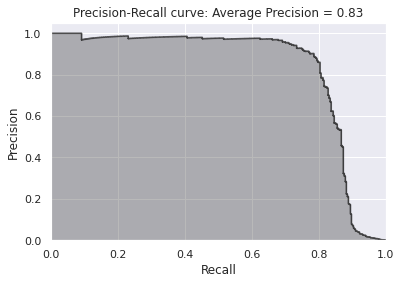

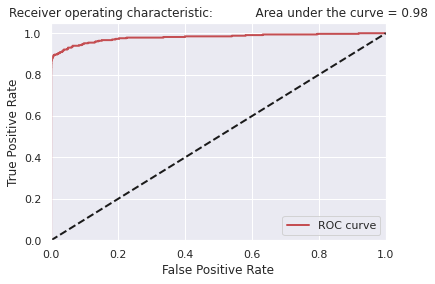

In [0]:
preds = pd.concat([y_train,predictionsBasedOnKFolds], axis=1)
preds.columns = ['true','pred','pred_prob']
preds['pred']=preds['pred'].astype('int64')
predictionsBasedOnKFoldsLightGBMGradientBoosting = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['true'],preds['pred_prob'])
average_precision = average_precision_score(preds['true'],preds['pred_prob'])
fpr, tpr, thresholds = roc_curve(preds['true'],preds['pred_prob'])
areaUnderROC = auc(fpr, tpr)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [0]:
confmat = confusion_matrix(pd.DataFrame(preds['true']),preds['pred'])
print('accuracy_score: \n',accuracy_score(preds['true'],preds['pred']))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(preds['true'],preds['pred']))

accuracy_score: 
 0.9994602242951472
confusion_matrix 
 [[190469     21]
 [    82    248]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    190490
           1       0.92      0.75      0.83       330

    accuracy                           1.00    190820
   macro avg       0.96      0.88      0.91    190820
weighted avg       1.00      1.00      1.00    190820



### Test set Evaluation

In [0]:
predictionsTestSetLogisticRegression = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])

predictionsTestSetLogisticRegression.loc[:,'prediction'] = \
    logReg.predict_proba(X_test)[:,1]
    
logLossTestSetLogisticRegression = \
    log_loss(y_test, predictionsTestSetLogisticRegression)

In [0]:
predictionsTestSetRandomForests = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])

predictionsTestSetRandomForests.loc[:,'prediction'] = \
    RFC.predict_proba(X_test)[:,1]
    
logLossTestSetRandomForests = \
    log_loss(y_test, predictionsTestSetRandomForests)

In [0]:
predictionsTestSetXGBoostGradientBoosting = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
dtest = xgb.DMatrix(data=X_test)

predictionsTestSetXGBoostGradientBoosting.loc[:,'prediction'] = \
    bst.predict(dtest)
    
logLossTestSetXGBoostGradientBoosting = \
    log_loss(y_test, predictionsTestSetXGBoostGradientBoosting)

In [0]:
predictionsTestSetLightGBMGradientBoosting = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])

predictionsTestSetLightGBMGradientBoosting.loc[:,'prediction'] = \
    gbm.predict(X_test, num_iteration=gbm.best_iteration)
    
logLossTestSetLightGBMGradientBoosting = \
    log_loss(y_test, predictionsTestSetLightGBMGradientBoosting)

In [0]:
print("Log Loss of Logistic Regression on Test Set: ", \
          logLossTestSetLogisticRegression)
print("Log Loss of Random Forests on Test Set: ", \
          logLossTestSetRandomForests)
print("Log Loss of XGBoost Gradient Boosting on Test Set: ", \
          logLossTestSetXGBoostGradientBoosting)
print("Log Loss of LightGBM Gradient Boosting on Test Set: ", \
          logLossTestSetLightGBMGradientBoosting)

Log Loss of Logistic Regression on Test Set:  0.09675150040743731
Log Loss of Random Forests on Test Set:  0.009038985836715724
Log Loss of XGBoost Gradient Boosting on Test Set:  0.0024243744683651214
Log Loss of LightGBM Gradient Boosting on Test Set:  0.002516958317012632


In [0]:
def precision_recall_plot(predictions):
  precision, recall, thresholds = \
      precision_recall_curve(y_test,predictions)
  average_precision = \
      average_precision_score(y_test,predictions)

  plt.step(recall, precision, color='k', alpha=0.7, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])

  plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
            average_precision))

  fpr, tpr, thresholds = roc_curve(y_test,predictions)
  areaUnderROC = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
  plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic: \
  Area under the curve = {0:0.2f}'.format(areaUnderROC))
  plt.legend(loc="lower right")
  plt.show()

predictionsTestSetLogisticRegression


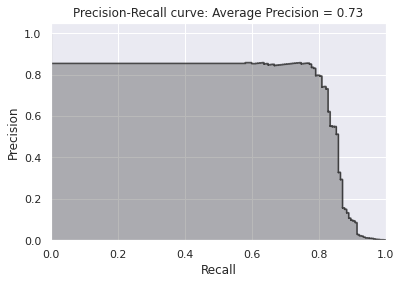

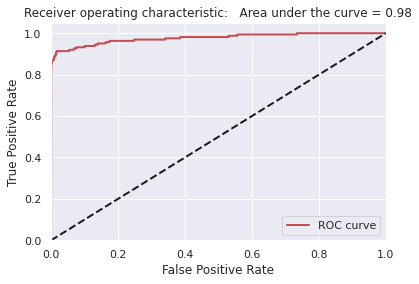

predictionsTestSetRandomForests


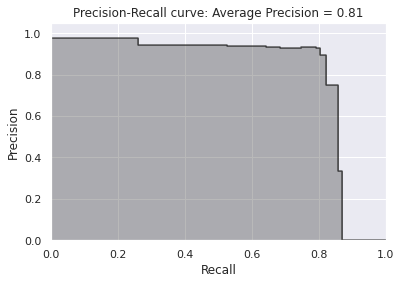

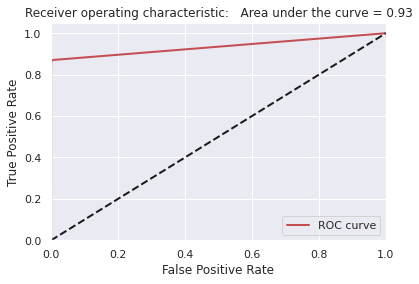

predictionsTestSetXGBoostGradientBoosting


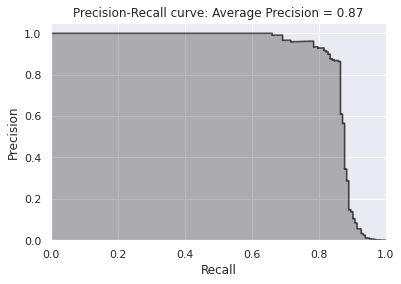

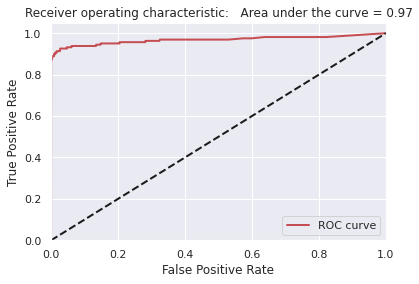

predictionsTestSetLightGBMGradientBoosting


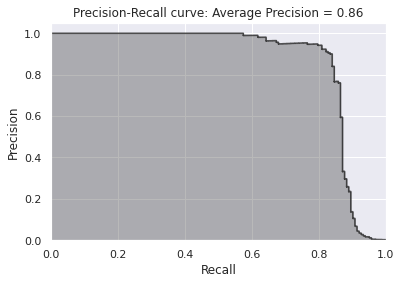

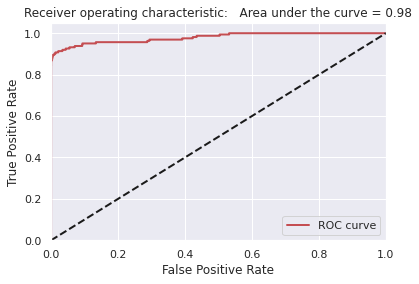

In [0]:
print('predictionsTestSetLogisticRegression')
precision_recall_plot(predictionsTestSetLogisticRegression)
print('predictionsTestSetRandomForests')
precision_recall_plot(predictionsTestSetRandomForests)
print('predictionsTestSetXGBoostGradientBoosting')
precision_recall_plot(predictionsTestSetXGBoostGradientBoosting)
print('predictionsTestSetLightGBMGradientBoosting')
precision_recall_plot(predictionsTestSetLightGBMGradientBoosting)

### Ensemble (stacking)

In our problem here, two of the models (LightGBM gradient boosting and
XGBoost gradient boosting) are much stronger than the others (random
forests and logistic regression). But the two strongest models are from the
same family, which means their strengths and weaknesses will be highly
correlated.

We can use stacking (which is a form of ensembling) to determine whether
we can get an improvement in performance compared to the standalone
models from earlier. In stacking, we take the predictions from the k-fold
cross-validation from each of the four standalone models (known as layer
one predictions) and append them to the original training dataset. We then train on this original features plus layer one predictions dataset using kfold cross-validation.
This will result in a new set of k-fold cross-validation predictions, known
as layer two predictions, which we will evaluate to see if we have an
improvement in performance over any of the standalone models.

In [0]:
predictionsBasedOnKFoldsFourModels = pd.DataFrame(data=[],index=y_train.index)
predictionsBasedOnKFoldsFourModels = predictionsBasedOnKFoldsFourModels.join(
    predictionsBasedOnKFoldsLogisticRegression['pred_prob'].astype(float), \
    how='left').join(predictionsBasedOnKFoldsRandomForests['pred_prob'] \
    .astype(float),how='left',rsuffix="2").join( \
    predictionsBasedOnKFoldsXGBoostGradientBoosting['pred_prob'].astype(float), \
    how='left',rsuffix="3").join( \
    predictionsBasedOnKFoldsLightGBMGradientBoosting['pred_prob'].astype(float), \
    how='left',rsuffix="4")
predictionsBasedOnKFoldsFourModels.columns = \
    ['predsLR','predsRF','predsXGB','predsLightGBM']

In [0]:
predictionsBasedOnKFoldsFourModels

,predsLR,predsRF,predsXGB,predsLightGBM
142087,0.000835,0.000037,0.022460,0.000037
165168,0.031959,0.000089,0.022442,0.000089
235908,0.160650,0.000058,0.022463,0.000058
148255,0.006911,0.000064,0.022412,0.000064
145672,0.037343,0.000123,0.022442,0.000123
...,...,...,...,...
30023,0.251887,0.000149,0.022460,0.000149
195475,0.039396,0.000094,0.022463,0.000094
48687,0.018567,0.000023,0.022463,0.000023
159608,0.004704,0.000007,0.022451,0.000007


In [0]:
X_trainWithPredictions = \
    X_train.merge(predictionsBasedOnKFoldsFourModels,
                  left_index=True,right_index=True)

In [0]:
X_trainWithPredictions

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,predsLR,predsRF,predsXGB,predsLightGBM
142087,84575.0,-1.011878,1.170867,0.201381,-0.252129,-0.386390,-0.049420,-0.192587,0.932578,-0.220587,0.378852,0.891074,0.647913,-0.481924,0.886427,0.511591,0.459248,-0.176015,-0.127882,-0.030033,0.238737,-0.233631,-0.783226,0.157078,-0.586703,-0.161425,0.230941,0.525280,0.473651,-0.297296,0.000835,0.000037,0.022460,0.000037
165168,117245.0,0.072173,0.665164,-0.241837,-0.380205,0.699456,-0.634194,0.838470,-0.137344,-0.167262,-0.790319,-0.489896,0.363837,0.879481,-1.240116,-0.370056,0.316326,0.391812,-0.403472,-0.309831,0.098082,-0.446548,-1.039925,0.148460,1.079003,-0.761713,0.220597,0.564453,0.262996,-0.337757,0.031959,0.000089,0.022442,0.000089
235908,148591.0,0.099579,-0.389819,-0.944884,-1.492064,-0.090536,-0.879539,1.260059,-0.577069,-2.758547,0.977409,-0.732842,-0.937703,0.749455,0.176803,-1.085530,-2.044358,1.112251,-0.420870,0.040079,0.135386,0.615087,2.051663,0.537784,1.887247,-0.950002,0.194730,0.394588,0.814038,0.499962,0.160650,0.000058,0.022463,0.000058
148255,89630.0,0.015623,0.520260,0.191791,-0.418058,0.320155,-0.775673,0.821509,-0.159150,-0.060892,-0.391007,-0.836480,0.227011,0.138962,0.096076,-0.404399,-0.179650,-0.423797,-1.016950,-0.193345,-0.039324,-0.342336,-0.740217,0.130539,-0.027853,-0.956686,0.296304,0.619910,0.294929,-0.329281,0.006911,0.000064,0.022412,0.000064
145672,87121.0,0.009169,0.524802,0.173686,-0.334556,0.766454,0.505087,0.267757,0.189101,-0.186534,-0.833822,0.231309,0.688669,1.262601,-1.535982,-0.324980,1.231887,-0.313090,1.377342,0.855879,0.107825,-0.201647,-0.456069,0.049791,-0.727602,-2.183860,-0.148240,0.585847,0.762249,-0.333279,0.037343,0.000123,0.022442,0.000123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30023,35743.0,-0.249496,0.101075,0.909879,-0.688839,-0.389697,-0.969098,0.404471,-0.295909,-1.322352,0.191754,-0.006297,-0.143148,0.790528,-0.523796,-0.615915,0.256455,0.901118,-2.121468,0.976003,0.115211,0.369245,1.209182,-0.066533,1.627214,0.628748,-0.301789,-0.110189,0.057551,-0.241283,0.251887,0.000149,0.022460,0.000149
195475,131077.0,-0.254091,-2.756705,-2.082848,0.720192,-0.770847,0.043816,1.347183,-0.309383,0.281819,-0.211026,0.278861,-0.328197,-1.635081,1.323811,0.420262,0.750262,-0.892042,1.073540,-0.213397,3.172416,1.379262,-0.221650,-1.822138,0.611275,-0.865244,1.296414,-0.902976,0.455664,5.005845,0.039396,0.000094,0.022463,0.000094
48687,43742.0,0.106034,-1.131050,-0.470366,0.156445,-0.553642,-0.376423,0.654146,-0.283678,0.204805,-0.432029,-0.958501,-0.121456,0.113733,0.415596,1.318948,0.622449,-0.634298,-0.288609,0.361196,1.498658,0.098597,-1.586216,-0.825029,-0.620769,0.109427,1.733472,-0.501687,0.300189,2.041624,0.018567,0.000023,0.022463,0.000023
159608,112716.0,0.055698,0.496830,-0.098914,-0.582971,0.647489,-0.393782,0.810516,-0.116346,0.031466,-0.378264,-1.829348,-0.240612,0.130288,0.065815,-0.349600,0.244105,-0.922168,-0.476713,0.377217,0.002229,-0.444765,-1.058758,-0.074376,-1.672445,-0.672678,0.420560,0.603711,0.263881,-0.320925,0.004704,0.000007,0.022451,0.000007


In [0]:
params_lightGB = {
    'task': 'train',
    'application':'binary',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': 0,
    'num_threads':16
}

In [0]:
trainingScores = []
cvScores = []
predictionsBasedOnKFoldsEnsemble = \
    pd.DataFrame(data=[],index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), \
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = \
        X_trainWithPredictions.iloc[train_index,:], \
        X_trainWithPredictions.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, \
        gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration) 
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossEnsemble = log_loss(y_train, \
        predictionsBasedOnKFoldsEnsemble.loc[:,'prediction'])
print('Ensemble Log Loss: ', loglossEnsemble)

[1]	valid_0's binary_logloss: 0.00582187
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's binary_logloss: 0.00574307
[3]	valid_0's binary_logloss: 0.00566402
[4]	valid_0's binary_logloss: 0.00560885
[5]	valid_0's binary_logloss: 0.00554948
[6]	valid_0's binary_logloss: 0.00549021
[7]	valid_0's binary_logloss: 0.00543768
[8]	valid_0's binary_logloss: 0.00539253
[9]	valid_0's binary_logloss: 0.00534236
[10]	valid_0's binary_logloss: 0.00529649
[11]	valid_0's binary_logloss: 0.00524823
[12]	valid_0's binary_logloss: 0.00520543
[13]	valid_0's binary_logloss: 0.00516426
[14]	valid_0's binary_logloss: 0.00512708
[15]	valid_0's binary_logloss: 0.00508745
[16]	valid_0's binary_logloss: 0.00505155
[17]	valid_0's binary_logloss: 0.00501269
[18]	valid_0's binary_logloss: 0.00497815
[19]	valid_0's binary_logloss: 0.00494381
[20]	valid_0's binary_logloss: 0.00491216
[21]	valid_0's binary_logloss: 0.00487872
[22]	valid_0's binary_logloss: 0.0048468
[23]	valid_0's binary_l

In [0]:
print('Feature importances:', list(gbm.feature_importance()))

Feature importances: [111, 123, 71, 96, 157, 60, 93, 136, 126, 74, 182, 110, 126, 131, 300, 83, 160, 56, 81, 225, 58, 78, 145, 76, 90, 239, 172, 94, 34, 299, 177, 416, 249, 0]


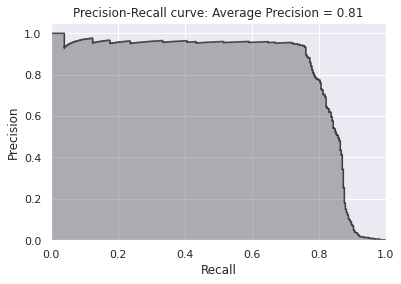

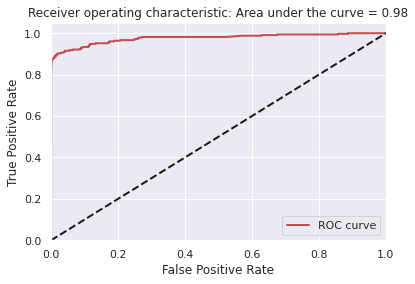

In [0]:
preds = pd.concat([y_train,predictionsBasedOnKFoldsEnsemble.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [0]:
print(thresholds.shape)
print(precision.shape)
print(recall.shape)

(17169,)
(99828,)
(99828,)


ValueError: ignored

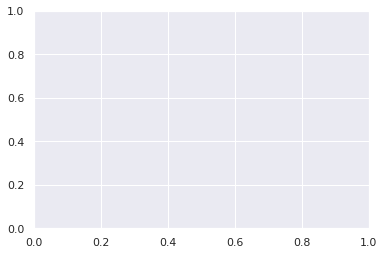

In [0]:
plt.plot(thresholds, precision[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recall[:-1], "g-", label="Recall", linewidth=2)

plt.axvline(x=0.5,label="threshold 50%")

plt.legend()
plt.show()

### Final model selection

Since the ensemble does not improve performance, we favor the simplicity
of the standalone LightGBM gradient boosting model and will use it in
production.
Before we create a pipeline for new, incoming transactions, let’s visualize
how well the LightGBM model separates the fraudulent transactions from
the normal transactions for the test set.

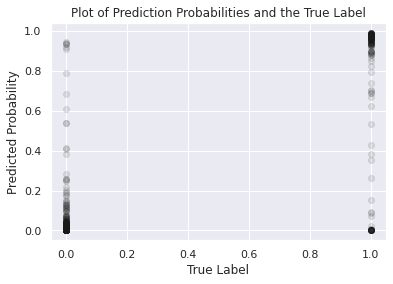

In [0]:
scatterData = predictionsTestSetLightGBMGradientBoosting.join(y_test,how='left')
scatterData.columns = ['Predicted Probability','True Label']
ax = sns.regplot(x="True Label", y="Predicted Probability", color='k', 
                 fit_reg=False, scatter_kws={'alpha':0.1},
                 data=scatterData).set_title( \
                'Plot of Prediction Probabilities and the True Label')

In [0]:
scatterData

,Predicted Probability,True Label
67353,0.000033,0
67626,0.000025,0
169699,0.005002,0
217315,0.000099,0
111420,0.000034,0
...,...,...
70762,0.000034,0
69843,0.000209,0
191806,0.000039,0
259722,0.000050,0


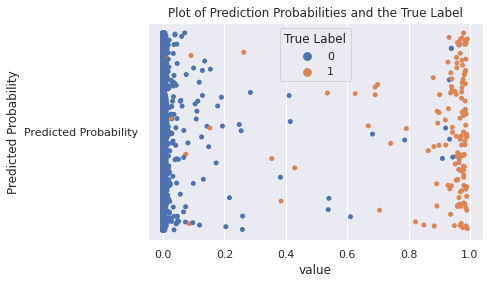

In [0]:
scatterDataMelted = pd.melt(scatterData, "True Label", \
                            var_name="Predicted Probability")
ax = sns.stripplot(x="value", y="Predicted Probability", \
                   hue='True Label', jitter=0.4, \
                   data=scatterDataMelted).set_title( \
                   'Plot of Prediction Probabilities and the True Label')

Once these predictions are generated, analysts can act on (i.e., investigate
further) the ones with the highest predicted probability of being fraudulent
and work through the list. Or, if automation is the goal, analysts can use a
system that automatically rejects transactions that have a predicted
probability of being fraudulent above a certain threshold.

For example, based on Figure 2-13, if we automatically reject transactions
with a predicted probability above 0.90, we will reject cases that are
almost certain to be fraudulent without accidentally rejecting a case of not
fraud.

In [0]:
scatterDataMelted

,True Label,Predicted Probability,value
0,0,Predicted Probability,0.000033
1,0,Predicted Probability,0.000025
2,0,Predicted Probability,0.005002
3,0,Predicted Probability,0.000099
4,0,Predicted Probability,0.000034
...,...,...,...
93982,0,Predicted Probability,0.000034
93983,0,Predicted Probability,0.000209
93984,0,Predicted Probability,0.000039
93985,0,Predicted Probability,0.000050


In [0]:
'''Pipeline for New Data'''
# first, import new data into a dataframe called 'newData'
# second, scale data
# newData.loc[:,featuresToScale] = sX.transform(newData[featuresToScale])
# third, predict using LightGBM
# gbm.predict(newData, num_iteration=gbm.best_iteration)

'Pipeline for New Data'

## Undersampling Method

In [0]:
print(X_train_tran.shape)
print(y_train.shape)

(227845, 30)
(227845, 1)


In [0]:
# let us first join the train_x and train_y for ease of operation
trainData = pd.concat([X_train_tran,y_train],axis=1)
print(X_train_tran.shape)
print(trainData.shape)
trainData.head()

(227845, 30)
(227845, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.275963,-0.494703,0.336359,1.671146,1.691188,-0.702196,1.611537,-0.504085,0.803141,-0.133410,-0.333248,-1.950566,0.525636,1.118817,-1.120783,-1.119624,-0.786259,1.211697,-0.544076,2.077049,0.425314,-0.000323,0.341842,-0.115680,-1.068943,0.143695,2.911405,-0.103383,0.060435,0.051027,0
1,0.947087,1.124827,-0.572978,-1.833570,-1.368108,1.426447,2.347185,-0.678366,0.575397,-0.574240,0.742779,0.062094,-0.413704,-0.086610,0.176043,0.110164,0.626883,0.360042,-2.381476,0.862493,0.029315,0.032055,-0.009666,0.368296,1.174321,0.048042,-0.534724,-0.051754,-0.209520,-0.305379,0
2,1.496837,1.060460,-0.009382,-0.860340,0.237091,-0.003583,-0.936056,0.167027,-0.316704,0.580736,0.009561,-0.805139,0.284377,0.170906,0.452483,0.850220,-0.160410,-0.681341,0.021125,-0.244591,-0.305594,0.336222,1.233606,-0.031658,-0.115906,0.528794,-0.195663,-0.039900,-0.176775,-0.347699,0
3,-0.564987,-0.245610,0.386038,0.908891,-0.831725,-0.718034,-0.852843,-0.063514,0.152384,-1.592775,-0.073813,0.008907,0.252380,1.676543,-0.227060,0.287436,1.197725,0.496961,-1.973095,0.783334,0.132813,0.154143,0.178294,0.248471,1.191358,-1.202961,-1.277657,0.096322,0.326137,-0.291911,0
4,-0.971120,-0.186659,0.676714,0.858887,0.049184,0.072981,-0.744942,0.580194,-0.080990,-0.421536,-0.479375,-0.127417,0.181135,0.605147,-0.546274,0.920163,0.408851,-0.022625,-0.234257,-0.115409,0.203146,-0.342076,-0.898357,-0.018676,0.572787,-0.272249,0.147172,0.605324,0.300513,-0.333792,0


In [0]:
trainData.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [0]:
# Finding the indexes of the sample data set where the Class  is '1'
ind = trainData[trainData['Class']==1].index
print(len(ind))
# Seperate the minority classes
minData = trainData.loc[ind]
print(minData.shape)

394
(394, 31)


In [0]:
# Finding indexes of majority class
ind1 = trainData[trainData['Class']==0].index
print(len(ind1))
# Seperating the majority class
majData = trainData.loc[ind1]
print(majData.shape)
majData.head()

227451
(227451, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.275963,-0.494703,0.336359,1.671146,1.691188,-0.702196,1.611537,-0.504085,0.803141,-0.133410,-0.333248,-1.950566,0.525636,1.118817,-1.120783,-1.119624,-0.786259,1.211697,-0.544076,2.077049,0.425314,-0.000323,0.341842,-0.115680,-1.068943,0.143695,2.911405,-0.103383,0.060435,0.051027,0
1,0.947087,1.124827,-0.572978,-1.833570,-1.368108,1.426447,2.347185,-0.678366,0.575397,-0.574240,0.742779,0.062094,-0.413704,-0.086610,0.176043,0.110164,0.626883,0.360042,-2.381476,0.862493,0.029315,0.032055,-0.009666,0.368296,1.174321,0.048042,-0.534724,-0.051754,-0.209520,-0.305379,0
2,1.496837,1.060460,-0.009382,-0.860340,0.237091,-0.003583,-0.936056,0.167027,-0.316704,0.580736,0.009561,-0.805139,0.284377,0.170906,0.452483,0.850220,-0.160410,-0.681341,0.021125,-0.244591,-0.305594,0.336222,1.233606,-0.031658,-0.115906,0.528794,-0.195663,-0.039900,-0.176775,-0.347699,0
3,-0.564987,-0.245610,0.386038,0.908891,-0.831725,-0.718034,-0.852843,-0.063514,0.152384,-1.592775,-0.073813,0.008907,0.252380,1.676543,-0.227060,0.287436,1.197725,0.496961,-1.973095,0.783334,0.132813,0.154143,0.178294,0.248471,1.191358,-1.202961,-1.277657,0.096322,0.326137,-0.291911,0
4,-0.971120,-0.186659,0.676714,0.858887,0.049184,0.072981,-0.744942,0.580194,-0.080990,-0.421536,-0.479375,-0.127417,0.181135,0.605147,-0.546274,0.920163,0.408851,-0.022625,-0.234257,-0.115409,0.203146,-0.342076,-0.898357,-0.018676,0.572787,-0.272249,0.147172,0.605324,0.300513,-0.333792,0


In [0]:
# Take a random sample equal to length of the minority class to make the data set balanced
majSample = majData.sample(n=len(ind),
                           #random_state = 123
                           )
print(majSample.shape)
majSample.head()

(394, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
54320,0.395295,1.047305,-0.196908,-1.809654,-0.592621,1.771635,2.379072,-0.344836,0.600832,0.555695,-0.068579,0.060836,0.350808,-0.142735,0.718918,1.393512,-0.425431,-0.709151,-0.062434,-0.405295,-0.233295,0.362462,1.159880,0.031026,1.197969,0.702428,-0.826867,0.067031,-0.180804,-0.347699,0
68630,-0.803647,-0.144379,-0.166268,0.304307,1.341876,0.495624,0.301307,0.183125,0.227834,-0.578080,0.251336,1.435096,0.863484,-0.222636,0.566230,0.494418,-1.610749,0.882692,-0.518173,1.238983,0.502550,0.425438,1.067057,0.669784,-0.468807,-0.991756,-0.268099,0.155757,0.061753,0.122754,0
200325,0.666485,0.901685,-0.398819,-0.186466,0.785081,-0.338823,0.549455,-0.703536,0.313560,1.025370,0.282518,-0.004465,0.178295,-1.067605,0.202880,0.185041,1.156147,-1.371717,1.354703,-0.225742,-0.127629,0.133398,0.182668,0.279910,0.194866,-0.675305,-1.618712,0.109324,-0.049677,0.006954,0
171000,-1.925696,-0.235318,0.709859,-0.276678,1.089448,-0.011995,-0.016656,0.554285,0.425702,-0.764399,-0.565179,1.503315,0.826326,0.087180,-0.867113,-0.153283,-0.333973,1.771457,0.684081,0.592391,0.369992,0.216681,0.643600,0.430836,-0.171570,-0.619835,-0.509690,0.559228,0.274135,0.151246,0
57033,-0.345698,0.483446,-0.408675,0.447853,0.227837,-0.686689,-0.009488,-0.392095,0.208497,0.826709,-0.288983,-0.116485,-0.460732,-2.062023,0.371355,1.295681,-0.513233,0.782614,-1.421286,-0.915213,-0.100405,0.057557,0.007344,0.066160,0.202353,-0.059117,2.180482,-0.138186,0.053329,0.066727,0


In [0]:
# Concatenating both new data sets

balData = pd.concat([minData,majSample],axis = 0)
print('balanced data set shape',balData.shape)

balanced data set shape (788, 31)


In [0]:
# Shuffling the data set
balData = shuffle(balData)

In [0]:
balData

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
140661,-1.699438,-2.112861,4.936911,-9.888050,7.281641,-2.873312,-2.435403,-8.332620,3.815318,-5.191978,-10.808123,11.039460,-16.723801,0.241811,-18.458218,-0.423595,-11.781754,-16.422197,-6.001983,1.471369,1.826608,2.657164,0.350953,0.772158,-1.977490,-1.008589,1.319831,3.992874,2.169624,-0.347699,1
56502,-0.698372,-0.628458,0.604056,1.332581,0.067393,-0.567557,-0.695100,0.002169,0.430141,-0.322872,-0.602489,-0.431830,-0.312782,-0.784670,0.492668,1.265708,0.519835,-0.136075,0.015971,-0.228848,0.065082,-0.065973,-0.466183,-0.089814,1.128818,0.157405,0.444071,0.347290,0.142712,-0.288005,0
221640,0.166110,-2.824980,3.416489,-6.430177,5.932801,-3.172127,-1.128500,-5.519606,3.096671,-3.526337,-6.288555,6.901478,-10.134648,2.828937,-10.321359,-0.286898,-5.733307,-10.027270,-2.401351,1.874824,-0.083826,1.516662,0.312404,0.454108,-0.884611,-0.200881,0.875510,-0.731385,-2.838372,0.125464,1
211135,0.472778,0.023691,0.552190,0.206462,-0.414724,0.334929,-0.835509,0.847394,-0.204429,-0.134435,-0.394496,-0.784444,0.511374,0.707918,-0.027637,-0.525354,-0.147714,-0.524642,-0.998292,-0.112058,0.005951,-0.339113,-0.707000,0.095824,0.096587,-0.894599,0.282607,0.617226,0.296941,-0.340964,0
32027,-1.234183,-2.892619,3.475691,-4.646994,4.161243,-3.392034,-1.315415,-5.566684,3.201824,-5.037625,-6.873035,3.598064,-7.640729,1.697654,-8.645021,0.706849,-7.753738,-14.206895,-5.824765,3.227048,0.387211,1.516889,-1.326373,-0.177215,-0.293143,-0.170711,-0.101304,0.743748,0.658140,0.093426,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125375,0.730472,-1.299921,-0.828293,0.871936,-0.238885,0.673273,-0.673824,-0.487429,0.574191,-0.043620,-1.134521,-1.320859,-0.226610,-0.460610,0.347770,0.466292,0.733002,-0.417610,0.015546,-0.096951,0.775615,0.042367,-1.337975,0.070833,1.071022,0.408382,0.724726,-0.340195,-0.905536,0.016916,0
168511,-0.737134,-4.201767,-2.897442,-3.528837,0.849774,-2.407914,-0.997618,-1.573592,1.069601,-1.520629,-3.138600,0.140190,-4.282119,-0.242897,-3.810100,1.008624,0.962639,-4.645733,-2.156252,0.130820,-1.595728,0.586425,-0.108536,-4.926970,-0.643622,-0.552904,-0.704708,0.096691,-3.023510,0.920285,1
150889,-0.559639,-6.713873,7.693638,-6.516438,2.341196,-3.453616,4.317344,-15.001546,-30.842339,-0.353901,-4.628734,4.312816,-4.609264,-1.919952,-9.450171,-0.247382,-7.090352,-7.351209,-3.757129,0.064120,-4.516923,36.563574,-12.225554,8.446913,-1.054748,0.504313,-0.224723,3.115054,2.818107,-0.347699,1
145879,-1.832780,0.522076,1.204061,-3.137040,2.692788,-0.914865,-1.299698,-2.446775,0.734675,0.379965,-3.623960,3.495616,-7.184312,0.147209,-5.468010,1.834059,-3.015698,-1.544500,-0.467000,1.374330,0.263912,0.461278,-0.076409,1.128593,-0.613954,-3.892559,0.763074,0.968886,0.060646,-0.347699,1


In [0]:
# Making the new X_train and y_train
X_trainNew = balData.drop('Class',axis=1)
print(X_trainNew.shape)

# Making the new y_train
y_trainNew = balData['Class']
print(y_trainNew.shape)

(788, 30)
(788,)


Note: not sampling X_test and y_test. We will use model train from all sampling technique apply to train set to evaluate X test, y test

### Splot check different models

In [0]:
# Creating a list of the classifiers
classifiers = {
    'KNN':KNeighborsClassifier(),     
    'LR':LogisticRegression(),
    'LDA':LinearDiscriminantAnalysis(), 
    'CART':DecisionTreeClassifier(),
    'NB':GaussianNB(),
    'SVC':SVC(),
    #Ensemble:
    'RF':RandomForestClassifier(), #Bagging
    'AB':AdaBoostClassifier(),  #Boosting
    'GBM':GradientBoostingClassifier(), #Boosting
    'ET':ExtraTreesClassifier(), #Bagging
    #New from Matt cookbook
    'XGB':XGBClassifier(), #New
    'LGBM':LGBMClassifier(), #New
    
}

In [0]:
#Cross validate
import time
num_folds = 10
seed = 7
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro')}


names = []
train_acc=[]
train_rec_macro=[]
train_prec_macro=[]
test_acc=[]
test_rec_macro=[]
test_prec_macro=[]
fit_time=[]
time_=[]

for name, model in classifiers.items():
  start=time.time()
  estimator = model
  
  kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_validate(estimator, X_trainNew, y_trainNew, cv=kfold, scoring=scoring,
                              return_train_score=True)

  # Time :
  time_cal=time.time() - start
  print('time : %0.3f' % (time_cal),'\n')
  
  #results.append(cv_results) # array of values
  names.append(name)
  train_acc.append(cv_results['train_acc'].mean())
  train_rec_macro.append(cv_results['train_rec_macro'].mean())
  train_prec_macro.append(cv_results['train_prec_macro'].mean())
  test_acc.append( cv_results['test_acc'].mean())
  test_rec_macro.append(cv_results['test_rec_macro'].mean())
  test_prec_macro.append(cv_results['test_prec_macro'].mean())
  fit_time.append(cv_results['fit_time'].mean())
  time_.append(time_cal)

  #print(cv_results.keys())
  print("%s: train_acc: %0.2f train_rec_macro: %0.2f train_prec_macro: %0.2f \
  test_acc: %0.2f test_rec_macro: %0.2f test_prec_macro: %0.2f \
  fit_time: %0.2f" % 
       (name, cv_results['train_acc'].mean(),cv_results['train_rec_macro'].mean(),cv_results['train_prec_macro'].mean(),
       cv_results['test_acc'].mean(),cv_results['test_rec_macro'].mean(),cv_results['test_prec_macro'].mean(),
       cv_results['fit_time'].mean()))
 # print(name, cv_results['train_acc'].mean(),cv_results['train_rec_micro'],cv_results['train_prec_macro'],
  #      cv_results['test_acc'],cv_results['test_rec_micro'],cv_results['test_prec_macro'],
   #      cv_results['score_time'],cv_results['fit_time']) 


time : 0.593 

KNN: train_acc: 0.96 train_rec_macro: 0.96 train_prec_macro: 0.96   test_acc: 0.94 test_rec_macro: 0.94 test_prec_macro: 0.94   fit_time: 0.00
time : 0.291 

LR: train_acc: 0.96 train_rec_macro: 0.96 train_prec_macro: 0.96   test_acc: 0.95 test_rec_macro: 0.95 test_prec_macro: 0.95   fit_time: 0.02
time : 0.192 

LDA: train_acc: 0.92 train_rec_macro: 0.92 train_prec_macro: 0.93   test_acc: 0.91 test_rec_macro: 0.91 test_prec_macro: 0.92   fit_time: 0.01
time : 0.235 

CART: train_acc: 1.00 train_rec_macro: 1.00 train_prec_macro: 1.00   test_acc: 0.90 test_rec_macro: 0.90 test_prec_macro: 0.90   fit_time: 0.02
time : 0.082 

NB: train_acc: 0.92 train_rec_macro: 0.92 train_prec_macro: 0.92   test_acc: 0.92 test_rec_macro: 0.92 test_prec_macro: 0.92   fit_time: 0.00
time : 0.252 

SVC: train_acc: 0.94 train_rec_macro: 0.94 train_prec_macro: 0.94   test_acc: 0.93 test_rec_macro: 0.93 test_prec_macro: 0.93   fit_time: 0.01
time : 2.898 

RF: train_acc: 1.00 train_rec_macro: 1

In [0]:
df_results_val=pd.DataFrame(list(zip(names,test_acc,test_rec_macro,test_prec_macro,
                                     train_acc,train_rec_macro,train_prec_macro,
                                     fit_time,time_)),
                  columns=['Names','test_acc','test_rec_macro','test_prec_macro',
                           'train_acc','train_rec_macro','train_prec_macro',
                           'fit_time','time'])
df_results_val=df_results_val.sort_values(by='test_acc',ascending=False)
df_results_val

,Names,test_acc,test_rec_macro,test_prec_macro,train_acc,train_rec_macro,train_prec_macro,fit_time,time
1,LR,0.948004,0.947853,0.950842,0.957840,0.957840,0.959270,0.019782,0.290755
8,GBM,0.946754,0.946571,0.948904,1.000000,1.000000,1.000000,0.654465,6.628127
10,XGB,0.942908,0.942724,0.944668,0.998731,0.998731,0.998735,0.163334,1.732388
9,ET,0.940393,0.940224,0.945055,1.000000,1.000000,1.000000,0.127963,1.592036
11,LGBM,0.940377,0.940160,0.943018,1.000000,1.000000,1.000000,0.357708,3.745982
0,KNN,0.939111,0.938910,0.943824,0.957135,0.957137,0.958861,0.004137,0.592649
6,RF,0.934064,0.933814,0.938805,1.000000,1.000000,1.000000,0.261465,2.897651
7,AB,0.930234,0.929968,0.932791,0.998449,0.998448,0.998456,0.193321,2.196947
5,SVC,0.927702,0.927468,0.934965,0.938241,0.938240,0.943193,0.011271,0.251605
4,NB,0.917494,0.917276,0.923716,0.919627,0.919626,0.923728,0.002320,0.082268


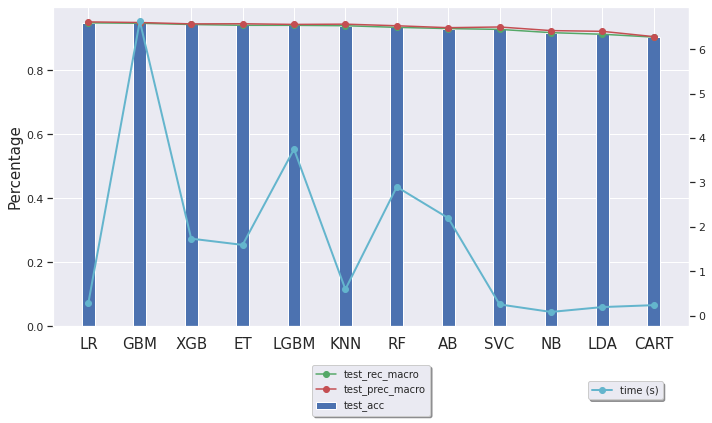

In [0]:
# Define name:
name=df_results_val['Names']
test_acc=df_results_val['test_acc']
test_rec_micro=df_results_val['test_rec_macro']
test_prec_macro=df_results_val['test_prec_macro']
time = df_results_val['time']
# Plot:
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, test_acc, color = 'b', width = 0.25,label='test_acc')
rects2 = ax.plot(x, test_rec_micro, color = 'g',marker='o',label='test_rec_macro')
rects3 = ax.plot(x, test_prec_macro, color = 'r',marker='o',label='test_prec_macro')

ax2 = ax.twinx()
ax2.plot(x,time,color ='c',marker='o',lw=2,label='time (s)')
ax2.secondary_yaxis('right')

ax.set_xticks(x)
ax.set_xticklabels(name,fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax2.set_ylabel('Time',fontsize=15)
#plt.gca().legend(loc ='center',bbox_to_anchor=(0.5, -0.2))
legend1=ax.legend(loc='center',bbox_to_anchor=(0.5, -0.2),shadow=True, fontsize='medium')
legend2=ax2.legend(loc='center',bbox_to_anchor=(0.9, -0.2),shadow=True, fontsize='medium')

plt.axis('off')
fig.tight_layout()
plt.show()

Benchmark model: Logistic Regression (LR)

In [0]:
churnModel1 = logReg
churnModel1.fit(X_trainNew, y_trainNew)
y_pred_1=churnModel1.predict(X_test_tran)
y_pred_probs_1=churnModel1.predict_proba(X_test_tran)

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs_1[:,1])
average_precision = average_precision_score(y_test,y_pred_probs_1[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs_1[:,1])
areaUnderROC = auc(fpr, tpr)

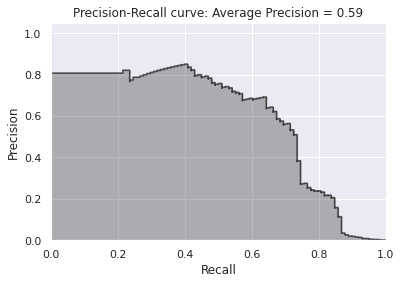

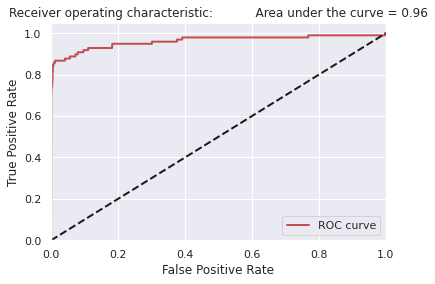

In [0]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [0]:
confmat = confusion_matrix(y_test,y_pred_1)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_1))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_1))

accuracy_score: 
 0.9694357641936729
confusion_matrix 
 [[55136  1728]
 [   13    85]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.87      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.54     56962
weighted avg       1.00      0.97      0.98     56962



## SMOTE

In [0]:
!pip install smote_variants

In [0]:
import smote_variants as sv
# Instantiating the SMOTE class
oversampler= sv.distance_SMOTE()

Luu y: du lieu phai duoc label encoder or get dummies truoc khi thuc hien oversampler

In [0]:
# Creating new training set
X_train_smote, y_train_smote = oversampler.sample(np.array(X_train_tran), np.array(y_train['Class']))

2020-06-06 03:32:22,846:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [0]:
print(y_train[y_train['Class']==0].shape)
print(X_train_tran.shape)
print(X_train_smote.shape)
# oversampler: class 1 is the same as class 0 (227451 * 2 = 454902)

(227451, 1)
(227845, 30)
(454902, 30)


In [0]:
X_train_smote_df=pd.DataFrame(X_train_smote,columns=X_train_tran.columns)
X_train_smote_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.275963,-0.494703,0.336359,1.671146,1.691188,-0.702196,1.611537,-0.504085,0.803141,-0.133410,-0.333248,-1.950566,0.525636,1.118817,-1.120783,-1.119624,-0.786259,1.211697,-0.544076,2.077049,0.425314,-0.000323,0.341842,-0.115680,-1.068943,0.143695,2.911405,-0.103383,0.060435,0.051027
1,0.947087,1.124827,-0.572978,-1.833570,-1.368108,1.426447,2.347185,-0.678366,0.575397,-0.574240,0.742779,0.062094,-0.413704,-0.086610,0.176043,0.110164,0.626883,0.360042,-2.381476,0.862493,0.029315,0.032055,-0.009666,0.368296,1.174321,0.048042,-0.534724,-0.051754,-0.209520,-0.305379
2,1.496837,1.060460,-0.009382,-0.860340,0.237091,-0.003583,-0.936056,0.167027,-0.316704,0.580736,0.009561,-0.805139,0.284377,0.170906,0.452483,0.850220,-0.160410,-0.681341,0.021125,-0.244591,-0.305594,0.336222,1.233606,-0.031658,-0.115906,0.528794,-0.195663,-0.039900,-0.176775,-0.347699
3,-0.564987,-0.245610,0.386038,0.908891,-0.831725,-0.718034,-0.852843,-0.063514,0.152384,-1.592775,-0.073813,0.008907,0.252380,1.676543,-0.227060,0.287436,1.197725,0.496961,-1.973095,0.783334,0.132813,0.154143,0.178294,0.248471,1.191358,-1.202961,-1.277657,0.096322,0.326137,-0.291911
4,-0.971120,-0.186659,0.676714,0.858887,0.049184,0.072981,-0.744942,0.580194,-0.080990,-0.421536,-0.479375,-0.127417,0.181135,0.605147,-0.546274,0.920163,0.408851,-0.022625,-0.234257,-0.115409,0.203146,-0.342076,-0.898357,-0.018676,0.572787,-0.272249,0.147172,0.605324,0.300513,-0.333792


In [0]:
churnModel2 = logReg
churnModel2.fit(X_train_smote_df, y_train_smote)

y_pred_2=churnModel2.predict(X_test_tran)
y_pred_probs_2=churnModel2.predict_proba(X_test_tran)
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs_2[:,1])
average_precision = average_precision_score(y_test,y_pred_probs_2[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs_2[:,1])
areaUnderROC = auc(fpr, tpr)

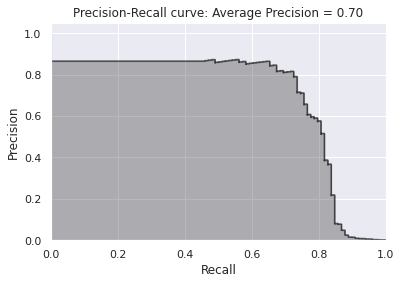

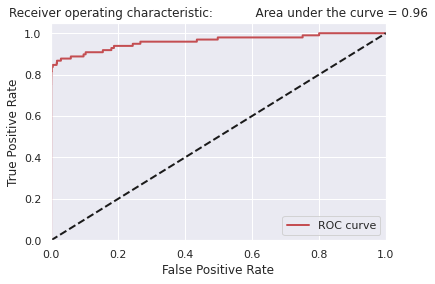

In [0]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [0]:
confmat = confusion_matrix(y_test,y_pred_2)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_2))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_2))

accuracy_score: 
 0.9746673220743653
confusion_matrix 
 [[55434  1430]
 [   13    85]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.87      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.97      0.99     56962



## MSMOTE

In [0]:
# Instantiating the MSMOTE class
oversampler= sv.MSMOTE()
X_train_msmote, y_train_msmote = oversampler.sample(np.array(X_train_tran), np.array(y_train['Class']))

2020-06-06 03:35:41,229:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [0]:
print(y_train_msmote.shape)
print(X_train_msmote.shape)

(454902,)
(454902, 30)


In [0]:
X_train_msmote_df=pd.DataFrame(X_train_msmote,columns=X_train_tran.columns)
X_train_msmote_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.275963,-0.494703,0.336359,1.671146,1.691188,-0.702196,1.611537,-0.504085,0.803141,-0.133410,-0.333248,-1.950566,0.525636,1.118817,-1.120783,-1.119624,-0.786259,1.211697,-0.544076,2.077049,0.425314,-0.000323,0.341842,-0.115680,-1.068943,0.143695,2.911405,-0.103383,0.060435,0.051027
1,0.947087,1.124827,-0.572978,-1.833570,-1.368108,1.426447,2.347185,-0.678366,0.575397,-0.574240,0.742779,0.062094,-0.413704,-0.086610,0.176043,0.110164,0.626883,0.360042,-2.381476,0.862493,0.029315,0.032055,-0.009666,0.368296,1.174321,0.048042,-0.534724,-0.051754,-0.209520,-0.305379
2,1.496837,1.060460,-0.009382,-0.860340,0.237091,-0.003583,-0.936056,0.167027,-0.316704,0.580736,0.009561,-0.805139,0.284377,0.170906,0.452483,0.850220,-0.160410,-0.681341,0.021125,-0.244591,-0.305594,0.336222,1.233606,-0.031658,-0.115906,0.528794,-0.195663,-0.039900,-0.176775,-0.347699
3,-0.564987,-0.245610,0.386038,0.908891,-0.831725,-0.718034,-0.852843,-0.063514,0.152384,-1.592775,-0.073813,0.008907,0.252380,1.676543,-0.227060,0.287436,1.197725,0.496961,-1.973095,0.783334,0.132813,0.154143,0.178294,0.248471,1.191358,-1.202961,-1.277657,0.096322,0.326137,-0.291911
4,-0.971120,-0.186659,0.676714,0.858887,0.049184,0.072981,-0.744942,0.580194,-0.080990,-0.421536,-0.479375,-0.127417,0.181135,0.605147,-0.546274,0.920163,0.408851,-0.022625,-0.234257,-0.115409,0.203146,-0.342076,-0.898357,-0.018676,0.572787,-0.272249,0.147172,0.605324,0.300513,-0.333792


In [0]:
churnModel3 = LogisticRegression()
churnModel3.fit(X_train_msmote_df, y_train_msmote)
y_pred_3=churnModel3.predict(X_test_tran)
y_pred_probs_3=churnModel3.predict_proba(X_test_tran)
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs_3[:,1])
average_precision = average_precision_score(y_test,y_pred_probs_3[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs_3[:,1])
areaUnderROC = auc(fpr, tpr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



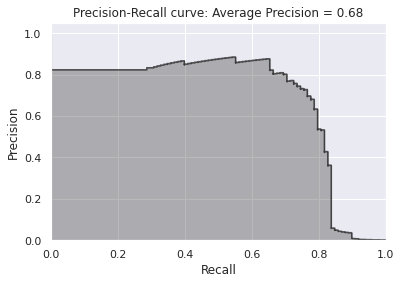

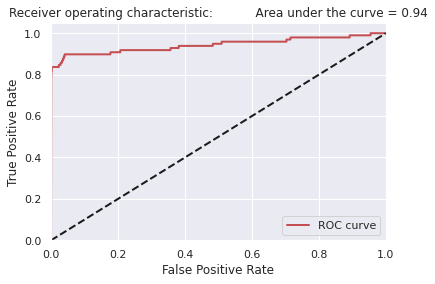

In [0]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [0]:
confmat = confusion_matrix(y_test,y_pred_3)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_3))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_3))

accuracy_score: 
 0.9973315543695798
confusion_matrix 
 [[56729   135]
 [   17    81]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.38      0.83      0.52        98

    accuracy                           1.00     56962
   macro avg       0.69      0.91      0.76     56962
weighted avg       1.00      1.00      1.00     56962



## Predictions with all three models

In [0]:
# Predicting using Under sampler
y_pred_us = churnModel1.predict(X_test_tran)
y_pred_probs_us=churnModel1.predict_proba(X_test_tran)
# Predicting using SMOTE
y_pred_smote = churnModel2.predict(X_test_tran)
y_pred_probs_smote=churnModel2.predict_proba(X_test_tran)
# Predicting using MSMOTE
y_pred_msmote = churnModel3.predict(X_test_tran)
y_pred_probs_msmote=churnModel3.predict_proba(X_test_tran)

In [0]:
# Printing accuracy of each model
print('Accuracy on test set for Random Undersampled data set: {:.2f}'.format(churnModel1.score(X_test_tran, y_test)))
print('Accuracy on test set for SMOTE data set: {:.2f}'.format(churnModel2.score(X_test_tran, y_test)))
print('Accuracy on test set for MSMOTE data set: {:.2f}'.format(churnModel3.score(X_test_tran, y_test)))

Accuracy on test set for Random Undersampled data set: 0.97
Accuracy on test set for SMOTE data set: 0.97
Accuracy on test set for MSMOTE data set: 1.00


Null accuracy

In [0]:
y_test['Class'].value_counts(normalize=True)

0    0.99828
1    0.00172
Name: Class, dtype: float64

In [0]:
 def ROC_plot(y_test,y_pred_probs):
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
  print('AUC',auc(fpr, tpr))
  fig, ax = plt.subplots()
  ax.plot(fpr, tpr)
  ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.rcParams['font.size'] = 12
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate (1 - Specificity)')
  plt.ylabel('True Positive Rate (Sensitivity)')
  plt.grid(True)
  # Type I error: False positive. if FP high so Type II will be decreased
  # Type II error: False negative

In [0]:
def pre_recal_curve(y_test, y_pred):
  precision, recall, threshold = precision_recall_curve(y_test, y_pred)#
  average_precision = average_precision_score(y_test,y_pred)
  print('average_precision: ',average_precision)
  #auc= auc(recall, precision)
  # plot the precision-recall curves
  no_skill = len(y_test[y_test['Class']==1]) / len(y_test)
  plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
  plt.plot(recall, precision, marker='.', label='Model')
  # axis labels
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  # show the legend
  plt.legend()
  # show the plot
  plt.show()

In [0]:
# Metrics for Random undersample data set
print(confusion_matrix(y_test, y_pred_us))
print(classification_report(y_test, y_pred_us))

[[55232  1632]
 [   12    86]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.88      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.54     56962
weighted avg       1.00      0.97      0.98     56962



AUC 0.9683588052553604


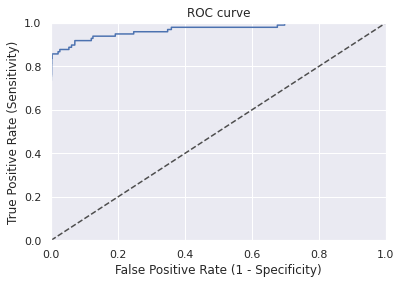

In [0]:
ROC_plot(y_test['Class'],y_pred_probs_us[:,1])

average_precision:  0.6789530957841322


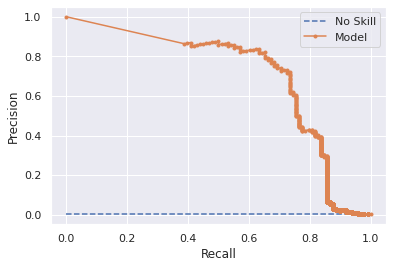

In [0]:
pre_recal_curve(y_test,y_pred_probs_us[:,1])

In [0]:
# Metrics for SMOTE data set
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))

[[55416  1448]
 [   13    85]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.87      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.97      0.99     56962



AUC 0.9606432067058676


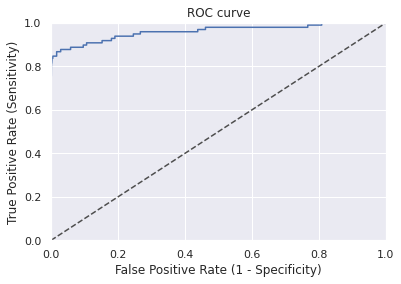

In [0]:
ROC_plot(y_test['Class'],y_pred_probs_smote[:,1])

average_precision:  0.6957393833706752


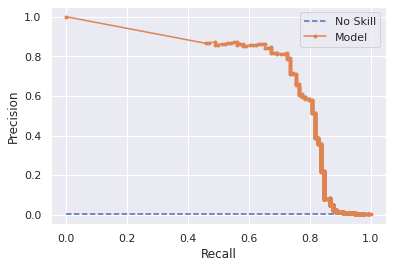

In [0]:
pre_recal_curve(y_test,y_pred_probs_smote[:,1])

In [0]:
# Metrics for MSMOTE data set
print(confusion_matrix(y_test, y_pred_msmote))
print(classification_report(y_test, y_pred_msmote))

[[56728   136]
 [   17    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.37      0.83      0.51        98

    accuracy                           1.00     56962
   macro avg       0.69      0.91      0.76     56962
weighted avg       1.00      1.00      1.00     56962



AUC 0.9429194827903025


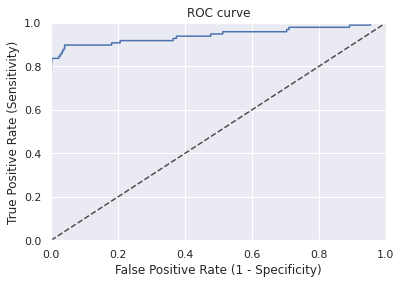

In [0]:
ROC_plot(y_test,y_pred_probs_msmote[:,1])

average_precision:  0.6819673394139731


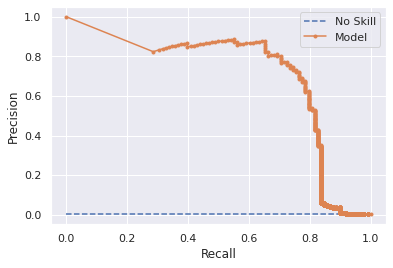

In [0]:
pre_recal_curve(y_test,y_pred_probs_msmote[:,1])

In [0]:
y_pred_probs_us[:,1]

array([0.00916617, 0.01165498, 0.01879368, ..., 0.39227336, 0.00261358,
       0.01364838])

In [0]:
y_test['Class']

0        0
1        0
2        0
3        0
4        0
        ..
56957    0
56958    0
56959    0
56960    0
56961    0
Name: Class, Length: 56962, dtype: int64

In [0]:
f1 = f1_score(y_test, y_pred_us)
print('model: f1=%.3f' % (f1))

model: f1=0.095


In [0]:
Pre_Rec_df = pd.DataFrame([threshold,precision,recall]).T
Pre_Rec_df.columns= ["Thresholds", "Precision", "Recall"]
Pre_Rec_df

,Thresholds,Precision,Recall
0,0.010898,0.002878,1.000000
1,0.010899,0.002849,0.989796
2,0.010899,0.002849,0.989796
3,0.010900,0.002849,0.989796
4,0.010901,0.002849,0.989796
...,...,...,...
31586,0.999391,1.000000,0.051020
31587,0.999406,1.000000,0.040816
31588,0.999416,1.000000,0.030612
31589,0.999432,1.000000,0.020408


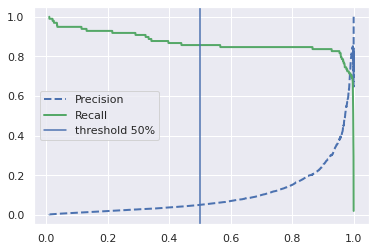

In [0]:
plt.plot(threshold, precision[:-1], "b--", label="Precision", linewidth=2)
plt.plot(threshold, recall[:-1], "g-", label="Recall", linewidth=2)

plt.axvline(x=0.5,label="threshold 50%")

plt.legend()
plt.show()